# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [7]:
import matplotlib
matplotlib.__version__

'3.8.0'

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
results.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
numMice = results["Mouse ID"].nunique()
numMice

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
results[results.duplicated(keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
results_df = results.set_index("Mouse ID")
results_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = results_df.drop(["g989"])

In [21]:
# Checking the number of mice in the clean DataFrame.
cleaned_df = cleaned.reset_index()
newNumMice = cleaned_df["Mouse ID"].nunique()
newNumMice

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor = cleaned_df.groupby(["Drug Regimen"])

tumorVolMean = tumor["Tumor Volume (mm3)"].mean()
tumorVolMed = tumor["Tumor Volume (mm3)"].median()
tumorVolVar = tumor["Tumor Volume (mm3)"].var()
tumorVolStd = tumor["Tumor Volume (mm3)"].std()
tumorVolMSem = tumor["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

tumor_df = pd.DataFrame({
    "Mean Tumor Volume": tumorVolMean,
    "Median Tumor Volume" : tumorVolMed,
    "Tumor Volume Variance" : tumorVolVar,
    "Tumor Volume Std. Dev." : tumorVolStd,
    "Tumor Volume Std. Err." : tumorVolMSem
})

tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_df_adv = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_df_adv

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

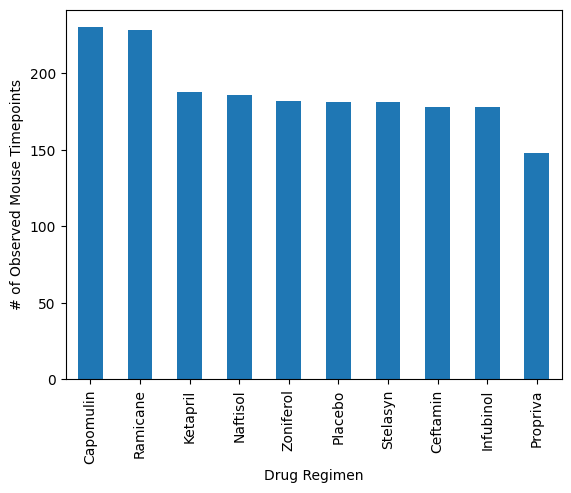

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = cleaned_df.groupby(["Drug Regimen"])["Timepoint"].count()
timepoints.sort_values(ascending = False).plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

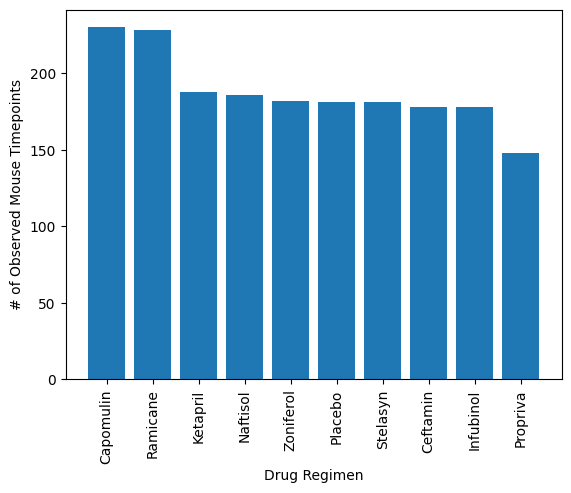

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_df = timepoints.sort_values(ascending = False)
plt.bar(timepoints_df.index, timepoints_df.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

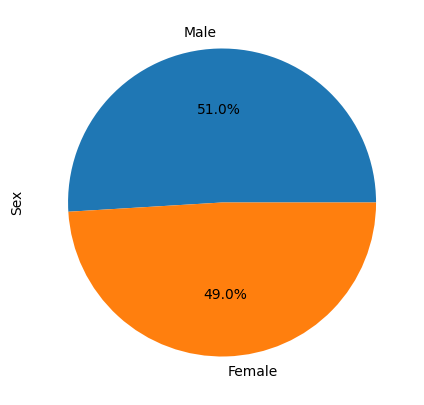

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
miceSex = cleaned_df.groupby(["Sex"])["Sex"].count()
miceSex.sort_values(ascending = False).plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.ylabel("Sex")
plt.show()

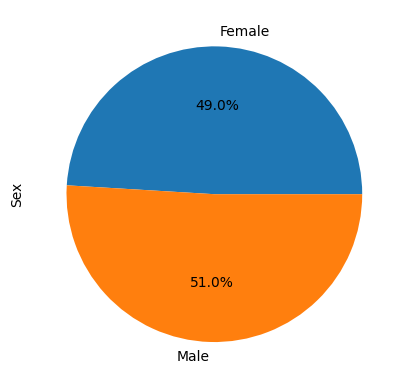

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(miceSex, labels = ("Female", "Male"), autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTimepoint = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxTime_df = pd.DataFrame(maxTimepoint)
lastTime = pd.merge(cleaned_df, maxTime_df, on = ("Mouse ID", "Timepoint"))
# lastTime

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolCap = []
tumorVolRam = []
tumorVolInf = []
tumorVolCef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in lastTime.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        tumorVolCap.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == regimen[1]:
        tumorVolRam.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == regimen[2]:
        tumorVolInf.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == regimen[3]:
        tumorVolCef.append(row["Tumor Volume (mm3)"])
    
    # add subset 
    
    # Determine outliers using upper and lower bounds



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


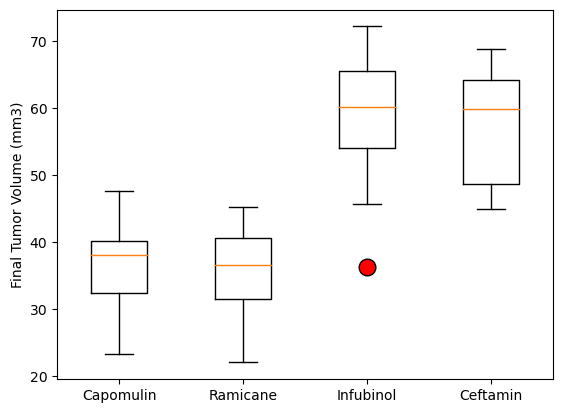

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

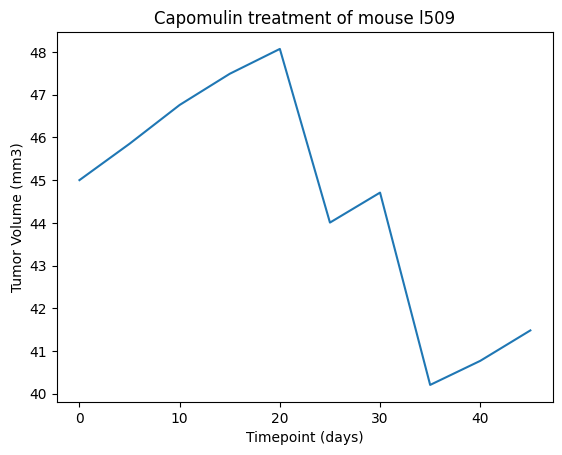

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509",:]

plt.plot(l509_df["Timepoint"], l509_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
avgVolCap = weight_df.groupby(["Mouse ID"]).mean()
plt.scatter(avgVolCap["Weight (g)"], avgVolCapavgVolCap["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

TypeError: agg function failed [how->mean,dtype->object]

## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(avgVolCap["Weight (g)"], avgVolCap["Tumor Volume (mm3)"])[0], 2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

line = st.linregress(avgVolCap["Weight (g)"], avgVolCap["Tumor Volume (mm3)"])
regressionLine = avgVolCap["Weight (g)"]* slope + intercept

plt.scatter(avgVolCap["Weight (g)"], avgVolCap["Tumor Volume (mm3)"])
plt.plot(avgVolCap["Weight (g)"], regressionLine)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


NameError: name 'avgVolCap' is not defined